Computational Take on Statistics: Permutation Testing
========

In [77]:
reset -fs

In [78]:
drug    = [54, 73, 53, 70, 73, 68, 52, 65, 65]
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]

In [79]:
from statistics import mean

observed_diff = mean(drug) - mean(placebo)

In [80]:
import matplotlib.pylab as plt
import seaborn as sns

palette = "Dark2"
%matplotlib inline

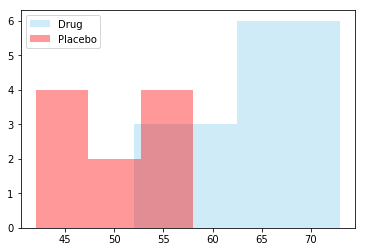

In [81]:
sns.distplot(drug, color="skyblue", label="Drug", kde=False);
sns.distplot(placebo, color="red", label="Placebo", kde=False);
plt.legend();

In [82]:
from random import shuffle

n = 10_000
count = 0
combined = drug + placebo
for i in range(n):
    shuffle(combined)
    new_diff = mean(combined[:len(drug)]) - mean(combined[len(drug):])
    count += (new_diff >= observed_diff)

In [83]:
print(f"""{n:,} label reshufflings produced only {count} instances with a difference
at least as extreme as the observed difference of {observed_diff:.1f}.""")

10,000 label reshufflings produced only 12 instances with a difference
at least as extreme as the observed difference of 13.0.


What is the p-values?

In [84]:
count / n

0.0012

What should we do?

Reject the null hypothesis that there is no difference between the drug and the placebo.""")

 The only hard part is deciding whether to do a one-sided test or a two-sided test.  It depends on what hypothesis you are testing.  If you think men are taller than women, or that the new drug is better than the old drug, then a one-sided test is appropriate.  If you think there is a difference between the groups but you don't know what it is, you can use a two-sided test; that is, use the absolute value of the difference as the test statistic.

This decision can seem arbitrary, but don't worry.  The effect on the p-value is just a factor of two, and (as I argued last time) we only care about the order of magnitude.  Whether the p-value is 2% or 4% or 8% doesn't really matter.

Any Questions?

Your turn for linear regression
-----

In [96]:
x = [95, 85, 80, 70, 60]
y = [85, 95, 70, 65, 70]

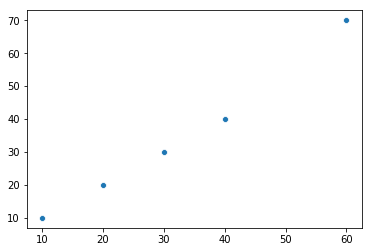

In [97]:
sns.scatterplot(x=x, y=y);

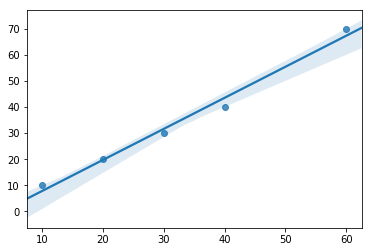

In [98]:
sns.regplot(x=x, y=y);

In [99]:
def slope(x, y):
    x_mean = mean(x)
    y_mean = mean(y)
    return sum((x[i]-x_mean)*(y[i]-y_mean) for i in range(len(x))) / sum((x[i]-x_mean)**2 for i in range(len(x)))

In [100]:
observed_slope = slope(x, y)
print(f"{observed_slope:,.4f}")

1.1892


https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit

In [101]:
n = 10_000

count = 0
for i in range(n):
    shuffle(y)
    new_slope = slope(x, y)
    count += (new_slope >= observed_slope)

In [102]:
print(f"""{n:,} label reshufflings produced only {count:,} instances with a difference
at least as extreme as the observed difference of {observed_slope:.1f}.""")

10,000 label reshufflings produced only 87 instances with a difference
at least as extreme as the observed difference of 1.2.


In [103]:
count / n

0.0087

What should we do?

Conclude there is not significatn linear relationship between these variables

Bonus Material
-----

Simulation of arrival times and service deliveries in a single server queue:

In [ ]:
from random import expovariate, gauss
from statistics import mean, median, stdev

In [ ]:


average_arrival_interval = 5.6
average_service_time = 5.0
stdev_service_time = 0.5

num_waiting = 0
arrivals = []
starts = []
arrival = service_end = 0.0
for i in range(20000):
    if arrival <= service_end:
        num_waiting += 1
        arrival += expovariate(1.0 / average_arrival_interval)
        arrivals.append(arrival)
    else:
        num_waiting -= 1
        service_start = service_end if num_waiting else arrival
        service_time = gauss(average_service_time, stdev_service_time)
        service_end = service_start + service_time
        starts.append(service_start)

waits = [start - arrival for arrival, start in zip(arrivals, starts)]
print(f'Mean wait: {mean(waits):.1f}.  Stdev wait: {stdev(waits):.1f}.')
print(f'Median wait: {median(waits):.1f}.  Max wait: {max(waits):.1f}.')

Resources
-------

- "[Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o)" by John Rauser
- "[Statistics is Easy](https://www.amazon.com/Statistics-Second-Synthesis-Lectures-Mathematics/dp/160845570X)" by Dennis Shasha and Manda Wilson
- [Raymond Hettinger's Modern Python course](https://github.com/rhettinger/modernpython/blob/master/resampling.py)
- https://stattrek.com/regression/regression-example.aspx

<br>
<br> 
<br>

----